<a href="https://colab.research.google.com/github/Nabarundutta/Machine-Learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

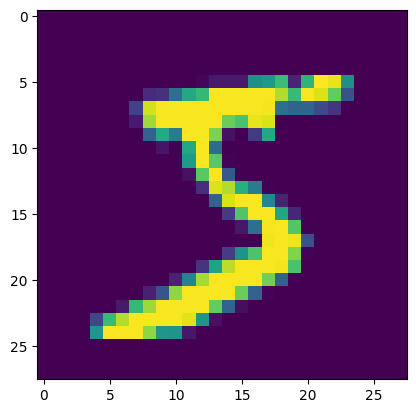

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
y_train[0]

5

In [9]:
X_train = X_train/255
X_test = X_test/255

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics = ['accuracy'])

In [26]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.4910 - val_loss: 0.1491
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1281 - val_loss: 0.1202
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0819 - val_loss: 0.1130
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0662 - val_loss: 0.1299
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0463 - val_loss: 0.1024
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0411 - val_loss: 0.1046
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0346 - val_loss: 0.0964
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0261 - val_loss: 0.1059
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0279 - val_loss: 0.1163
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0212 - val_loss: 0.1170


In [27]:
y_log = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
y_pred = y_log.argmax(axis=1)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9723

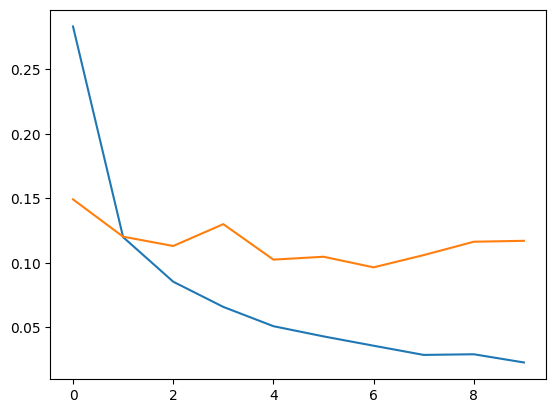

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])